# Generate a Radar Plot

# 00 - Import CSV with All Data
**The CSV is expected to be in this format**
- ID and absolute paths to niftis are critical
```
+-----+----------------------------+--------------+--------------+--------------+
| ID  | Nifti_File_Path            | Covariate_1  | Covariate_2  | Covariate_3  |
+-----+----------------------------+--------------+--------------+--------------+
| 1   | /path/to/file1.nii.gz      | 0.5          | 1.2          | 3.4          |
| 2   | /path/to/file2.nii.gz      | 0.7          | 1.4          | 3.1          |
| 3   | /path/to/file3.nii.gz      | 0.6          | 1.5          | 3.5          |
| 4   | /path/to/file4.nii.gz      | 0.9          | 1.1          | 3.2          |
| ... | ...                        | ...          | ...          | ...          |
+-----+----------------------------+--------------+--------------+--------------+
```

In [163]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Users/cu135/Dropbox (Partners HealthCare)/studies/review_pyper/metadata/metrics.csv'

In [164]:
# Specify where you want to save your results to
out_dir = '/Users/cu135/Dropbox (Partners HealthCare)/studies/review_pyper/figures/mansucript_figures/100_manuscript_questions/radars'
sheet = None

In [177]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=out_dir, sheet=sheet)
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()

,Variable,Inference_Range,Inference,Sensitivity,Specificity,Precision,PPV,NPV,Accuracy,F1_Score
0,Not Amnesia Case,Local,Data in Document,0.857143,1.000000,1.000000,1.000000,0.125000,0.86,0.923077
1,Confounding Disease,Medical,Diagnostic Inference,0.833333,0.136364,0.116279,0.116279,0.857143,0.22,0.204082
2,Insufficient Physical Exam,Local,Data in Document,0.905263,0.400000,0.966292,0.966292,0.181818,0.88,0.934783
3,Memory Deficit Unmeasured,Local,Data in Document,0.965116,0.642857,0.943182,0.943182,0.750000,0.92,0.954023
4,Due to Global Cognitive Damage,Medical,Diagnostic Inference,1.000000,0.024691,0.193878,0.193878,1.000000,0.21,0.324786
5,No Neuroimaging,Local,Data in Document,0.989796,1.000000,1.000000,1.000000,0.666667,0.99,0.994872
6,Due to Neurodegeneration,Medical,Diagnostic Inference,1.000000,0.032258,0.072165,0.072165,1.000000,0.10,0.134615
7,Atypical Amnesia,Medical,Diagnostic Inference,0.714286,0.182796,0.061728,0.061728,0.894737,0.22,0.113636
8,Not in English,Local,Data in Document,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.000000
9,Bias,Case,Case Quality Inference,0.090909,0.641026,0.066667,0.066667,0.714286,0.52,0.076923


In [178]:
data_df.drop(17, inplace=True)
data_df.drop(13, inplace=True)
# data_df.drop(14, inplace=True)


# 01 - Preprocess Your Data

**Handle NANs**
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [167]:
data_df.columns

Index(['Variable', 'Inference_Range', 'Inference', 'Sensitivity',
       'Specificity', 'Precision', 'PPV', 'NPV', 'Accuracy', 'F1_Score'],
      dtype='object')

In [168]:
drop_list = ['ch_retro_antero']

In [169]:
data_df = cal_palm.drop_nans_from_columns(columns_to_drop_from=drop_list)
display(data_df)

KeyError: ['ch_retro_antero']

**Drop Row Based on Value of Column**

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

In [170]:
data_df.columns

Index(['Variable', 'Inference_Range', 'Inference', 'Sensitivity',
       'Specificity', 'Precision', 'PPV', 'NPV', 'Accuracy', 'F1_Score'],
      dtype='object')

Set the parameters for dropping rows

In [179]:
column = 'Inference'  # The column you'd like to evaluate
condition = 'not'  # The condition to check ('equal', 'above', 'below')
value = 'Data in Document'  # The value to compare against

In [180]:
data_df, other_df = cal_palm.drop_rows_based_on_value(column, condition, value)
display(data_df)

,Variable,Inference_Range,Inference,Sensitivity,Specificity,Precision,PPV,NPV,Accuracy,F1_Score
0,Not Amnesia Case,Local,Data in Document,0.857143,1.000000,1.000000,1.000000,0.125000,0.86,0.923077
2,Insufficient Physical Exam,Local,Data in Document,0.905263,0.400000,0.966292,0.966292,0.181818,0.88,0.934783
3,Memory Deficit Unmeasured,Local,Data in Document,0.965116,0.642857,0.943182,0.943182,0.750000,0.92,0.954023
5,No Neuroimaging,Local,Data in Document,0.989796,1.000000,1.000000,1.000000,0.666667,0.99,0.994872
8,Not in English,Local,Data in Document,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.000000


**Standardize Data**
- Enter Columns you Don't want to standardize into a list

In [146]:
# Remove anything you don't want to standardize
# cols_not_to_standardize = ['Age']

In [147]:
# data_df = cal_palm.standardize_columns(cols_not_to_standardize)
# data_df



Descriptive Stats

In [148]:
data_df.describe()

,Sensitivity,Specificity,Precision,PPV,NPV,Accuracy,F1_Score
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.943464,0.808571,0.981895,0.981895,0.544697,0.930000,0.961351
std,0.060668,0.275829,0.026103,0.026103,0.378204,0.063246,0.034792
min,0.857143,0.400000,0.943182,0.943182,0.125000,0.860000,0.923077
25%,0.905263,0.642857,0.966292,0.966292,0.181818,0.880000,0.934783
50%,0.965116,1.000000,1.000000,1.000000,0.666667,0.920000,0.954023
75%,0.989796,1.000000,1.000000,1.000000,0.750000,0.990000,0.994872
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 02 Plot

**Grouped Barplot**
- Expects a Dataframe with a category the grouping variable that sets colour. 
- variable represents each thig to be plotted, like 'neuroimaging, bias, etc'. 
- metric is the value of the variable to be plotted.

In [181]:
import plotly.graph_objects as go
from math import pi
import os
from calvin_utils.statistical_utils.classification_statistics import BinaryDataMetricsPlotter
import matplotlib.pyplot as plt
import seaborn as sns

class VariableMetricsRadarPlotter(BinaryDataMetricsPlotter):
    def __init__(self, dataframe, variables_col, metric_cols, out_dir = None):
        """
        Initialize with a dataframe containing data, a list of variable columns, and a list of metric columns.
        """
        super().__init__(dataframe, None)  # Call the parent constructor, we won't use mapping_dict
        self.variable_cols = variables_col
        self.metric_cols = metric_cols
        self.out_dir = out_dir

    def plot_variable_metrics(self):
        """
        Plots a radar chart for each variable using the specified metrics.
        """
        # Iterate over each variable and plot the radar chart
        variable_metric_dict = {}
        for variable in self.dataframe['Variable']:
            filtered_df = self.dataframe[self.dataframe['Variable'] == variable]
            metric_values = {metric: filtered_df[metric].values[0] for metric in self.metric_cols if metric in filtered_df.columns}
            variable_metric_dict[variable] = metric_values
        self.plot_radar_charts(variable_metric_dict, specified_metrics=self.metric_cols)

    def plot_radar_charts(self, variable_metric_dict, specified_metrics):
        """
        Plots a radar chart for the provided dictionary of variables and their metrics.
        """
        # Set up the radar chart plot
        fig = plt.figure(figsize=(10, 8))
        ax = plt.subplot(111, polar=True)
        
        # Define angles for the radar chart
        num_vars = len(specified_metrics)
        angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
        angles += angles[:1]  # Complete the loop

        # sns color palette for different variables
        if num_vars<10:
            colors = sns.color_palette("tab10", len(variable_metric_dict))
        elif num_vars<20:
            colors = sns.color_palette("tab20", len(variable_metric_dict))
        else:
            colors = sns.color_palette("hsv", len(variable_metric_dict))
        
        # Plot each variable's metrics
        for idx, (variable, metrics) in enumerate(variable_metric_dict.items()):
            values = [metrics[metric] for metric in specified_metrics if metric in metrics]
            values += values[:1]  # Complete the loop for plotting
            ax.plot(angles, values, 'o-', linewidth=2, label=variable, color=colors[idx])
            # ax.fill(angles, values, alpha=0.25, color=colors[idx])

        # Configure the chart
        ax.set_thetagrids([a * 180 / pi for a in angles[:-1]], labels=specified_metrics)
        plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2", "0.4", "0.6", "0.8"], color="black", size=12)
        plt.ylim(0, 1)
        plt.title('Comparison of Metrics across Variables', size=20, color='black', family='Arial')
        plt.legend(loc='upper right', prop={'size': 16})
        
        if self.out_dir is not None:
            radar_plots_subdir = "radar_plots"
            os.makedirs(os.path.join(self.out_dir, radar_plots_subdir), exist_ok=True)

            plt.savefig(os.path.join(self.out_dir, radar_plots_subdir, f"{self.variable_cols}_radar.svg"))
            plt.savefig(os.path.join(self.out_dir, radar_plots_subdir, f"{self.variable_cols}_radar.png"))
            print("Saved to: ", os.path.join(self.out_dir, radar_plots_subdir, f"{self.variable_cols}_radar.svg"))
            
        plt.show()
        self.fig = fig

    def run(self):
        self.plot_variable_metrics()
        # self.save_figure()


In [182]:
data_df.columns

Index(['Variable', 'Inference_Range', 'Inference', 'Sensitivity',
       'Specificity', 'Precision', 'PPV', 'NPV', 'Accuracy', 'F1_Score'],
      dtype='object')

In [183]:
variables_column = 'Variable'
metrics_list = ['Sensitivity', 'Accuracy', 'Precision', 'Specificity']

Saved to:  /Users/cu135/Dropbox (Partners HealthCare)/studies/review_pyper/figures/mansucript_figures/100_manuscript_questions/radars/radar_plots/Variable_radar.svg


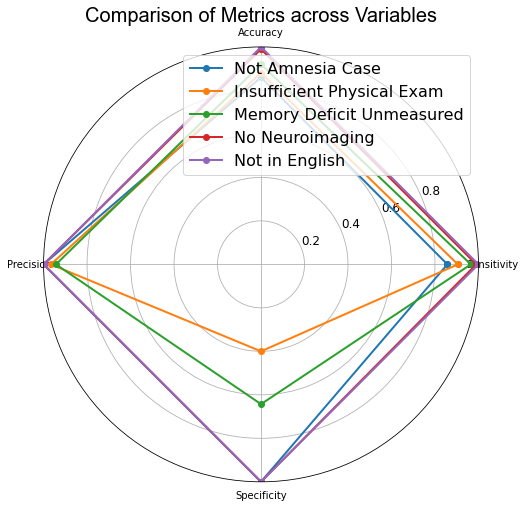

In [184]:
radar_plotter = VariableMetricsRadarPlotter(data_df, variables_column, metrics_list, out_dir=out_dir)
radar_plotter.run()

Enjoy
- Calvin